In [37]:
import pandas as pd

df = pd.read_csv('FAOSTAT_data_en_3-28-2025.csv')

print(df.shape)
print(df.columns)

df.head()

(601, 15)
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (SDG)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (SDG),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,SDGB,SDG Indicators,706,Somalia,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2010,2010,million No,8.6,E,Estimated value,Estimated | Food and Agriculture Organization ...
1,SDGB,SDG Indicators,706,Somalia,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2011,2011,million No,8.6,E,Estimated value,Estimated | Food and Agriculture Organization ...
2,SDGB,SDG Indicators,706,Somalia,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2012,2012,million No,8.3,E,Estimated value,Estimated | Food and Agriculture Organization ...
3,SDGB,SDG Indicators,706,Somalia,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2013,2013,million No,8.1,E,Estimated value,Estimated | Food and Agriculture Organization ...
4,SDGB,SDG Indicators,706,Somalia,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2014,2014,million No,8.1,E,Estimated value,Estimated | Food and Agriculture Organization ...


In [38]:
df.isnull().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (SDG)       0
Item                  0
Year Code             0
Year                  0
Unit                 46
Value               134
Flag                  0
Flag Description      0
Note                  0
dtype: int64

In [39]:
df = df.drop(columns=['Flag', 'Flag Description'], errors='ignore')

In [40]:
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

In [41]:
print(df['element'].unique())
print(df['item'].unique())
print(df['unit'].unique())
print(df['area'].unique())

['Value']
['2.1.1 Number of undernourished people'
 '2.1.1 Prevalence of undernourishment'
 '2.1.2 Number of severely food insecure people (female) (15 years old and over)'
 '2.1.2 Number of severely food insecure people (male) (15 years old and over)'
 '2.1.2 Number of severely food insecure people (both sexes or no breakdown by sex) (all age ranges or no breakdown by age)'
 '2.1.2 Prevalence of severe food insecurity (both sexes or no breakdown by sex) (all age ranges or no breakdown by age) (no breakdown by urbanisation)'
 '2.1.2 Prevalence of severe food insecurity (female) (15 years old and over) (no breakdown by urbanisation)'
 '2.1.2 Prevalence of severe food insecurity (male) (15 years old and over) (no breakdown by urbanisation)'
 '2.1.2 Number of moderately or severely food insecure people (female) (15 years old and over)'
 '2.1.2 Number of moderately or severely food insecure people (male) (15 years old and over)'
 '2.1.2 Number of moderately or severely food insecure people

In [42]:
# specific indicator like Prevalence of undernourishment
undernourishment = df[df['element'].str.contains('undernourishment', case=False)]

# making countries the index and years the columns
undernourishment_pivot = undernourishment.pivot_table(
    index='area', columns='year', values='value'
)

undernourishment_pivot.head()

year
area


In [43]:
countries = df['area'].unique()

In [44]:
import pycountry

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df['country_code'] = df['area'].apply(get_country_code)


In [45]:
undernourishment = df[df['item'] == '2.1.1 Prevalence of undernourishment']


In [46]:
insecurity = df[df['item'].str.contains('Prevalence of', case=False, na=False)]


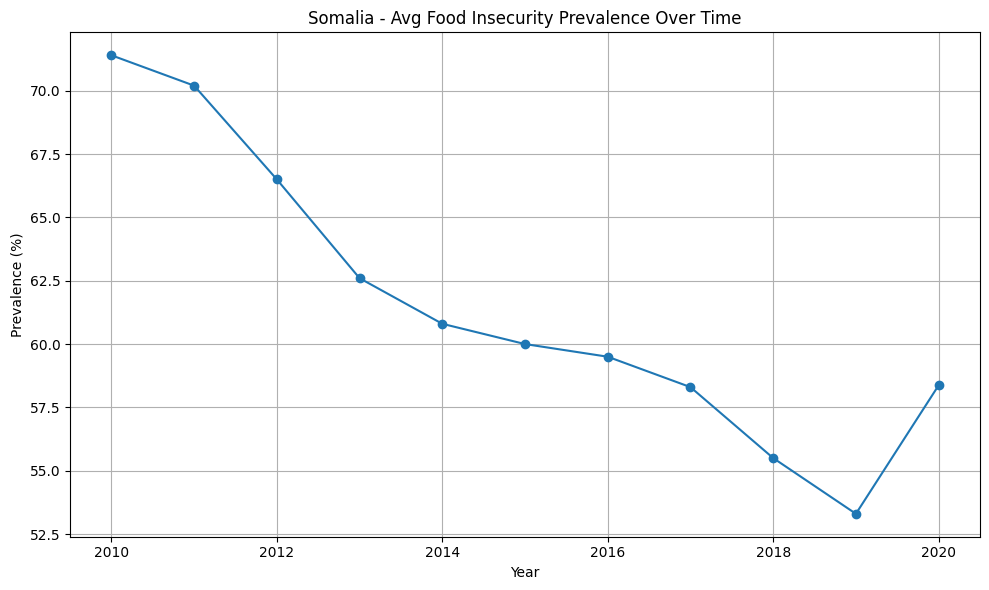

In [47]:
# Convert year
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop NaN values
insecurity = insecurity.dropna(subset=['value'])

# Group by year for Somalia
somalia = insecurity[insecurity['area'] == 'Somalia']
yearly_avg = somalia.groupby('year')['value'].mean()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
yearly_avg.plot(marker='o')
plt.title('Somalia - Avg Food Insecurity Prevalence Over Time')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
df = pd.read_csv('FAOSTAT_data_en_3-28-2025.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['value', 'year'])


In [49]:
indicators = [
    '2.1.1 Prevalence of undernourishment',
    '2.1.2 Prevalence of severe food insecurity (both sexes or no breakdown by sex) (all age ranges or no breakdown by age) (no breakdown by urbanisation)',
    '2.1.2 Prevalence of moderate or severe food insecurity (both sexes or no breakdown by sex) (all age ranges or no breakdown by age) (no breakdown by urbanisation)',
]

filtered_df = df[df['item'].isin(indicators)]


In [50]:
indicator_map = {
    indicators[0]: 'undernourishment',
    indicators[1]: 'severe_insecurity',
    indicators[2]: 'mod_or_severe_insecurity',
}

filtered_df['indicator'] = filtered_df['item'].map(indicator_map)


/var/folders/kx/sx1n54md3m186sp0nhxr3xkw0000gn/T/ipykernel_35034/1938759102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['indicator'] = filtered_df['item'].map(indicator_map)


In [51]:
final_df = filtered_df[['area', 'year', 'value', 'indicator']].rename(
    columns={'area': 'country', 'value': 'prevalence'}
)

final_df.head()


,country,year,prevalence,indicator
11,Somalia,2010,71.4,undernourishment
12,Somalia,2011,70.2,undernourishment
13,Somalia,2012,66.5,undernourishment
14,Somalia,2013,62.6,undernourishment
15,Somalia,2014,60.8,undernourishment
